# Neural Network

The goal of this project is to train a simple Neural Network.



![image-3.png](https://drive.google.com/uc?id=1SjPymYoI0iJPYAJqSKLttuUXjJi7fgB0)



# NN Training Steps

1. Feed Forward

2. Gradients

3. Backpropagation


---
## 1. Feed forward
---

- Apply linear transformation and activation function to determine the neurons in the next layers of NN


#### LAYER 1

![LHS NN](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_LHS.png?raw=true)


1. Linear Transformation:

$$
\vec{z}^{(1)} = \mathbf{W}^{(1)} \cdot \vec{x} + \vec{b}^{(1)}
$$

2. Activation Function (sigmoid):

$$
\vec{a}^{(1)} = \sigma(\vec{z}^{(1)})
$$

#### LAYER 2


![LHS NN](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_RHS.png?raw=true)

1. Linear Transformation:

$$
\vec{z}^{(2)} = \mathbf{W}^{(2)} \cdot \vec{a}^{(1)} + \vec{b}^{(2)}
$$

2. Activation Function (sigmoid):

$$
\vec{a}^{(2)} = \sigma(\vec{z}^{(2)})
$$




### This is the full forward propagation


> \begin{array}{ccccccccc}
\text{Input = Output Layer 0} & & \text{Layer 1} & & \text{Output Layer 1} & & \text{Layer 2} & & \text{Output Layer 2}\\
\hline
\vec{x} = \vec{a}^{(0)} & ⇒  & \mathbf{W}^{(1)} \cdot \vec{x} + \vec{b}^{(1)} = \vec{z}^{(1)} & ⇒ &
 \sigma(\vec{z}^{(1)}) = \vec{a}^{(1)} & ⇒ &  \mathbf{W}^{(2)} \cdot \vec{a}^{(1)} + \vec{b}^{(2)} = \vec{z}^{(2)} & ⇒ &  \sigma(\vec{z}^{(2)}) = \vec{a}^{(2)} = \hat{y}
\end{array}

![image-5.png](https://drive.google.com/uc?id=1ZmRXr2zCthT5kS3K4Ah532whDvKEX_mm)





---
## 2. Define the Loss/Cost function
---


![Cost function](https://github.com/gg5d/Math_Intro_NN/blob/master/screenshots_NN/small_NN_cost_function.png?raw=true)


---
## 3. Gradients
---

Define all parameters with a **fancy** symbol:  $\vec{\theta} = \{ W^{(1)}_{1,1},W^{(1)}_{2,1},...,b_1^{(1)},...\}$

Then the gradient of the Loss function is

$$
\nabla_{\vec{\theta}} C (\vec{\theta}) =
\begin{bmatrix}
\frac{\partial C}{\partial W^{(1)}_{1,1}},
\frac{\partial C}{\partial W^{(1)}_{2,1}},
\cdots,
\frac{\partial C}{\partial b^{(2)}_1},  
\end{bmatrix}
$$

We will visualize this in a smaller case for clarity:
(in this case W is used for the weight matrices instead of A)

![image-4.png](https://drive.google.com/uc?id=1xyP1ocJGA-pS6z1BUpNISUmlTK09L4g8)

---
## 4. Update Values of Weights: Backpropagation
---

(h is the learning rate)

![image-5.png](https://drive.google.com/uc?id=1E5OIQQMK-wXDHxSbMdYNacifuAD9weC_)

---
### 5. Repeat!
---

# Neural Network

>   #### Now we're going to complicate the simple Neural Network that we showed above.  Our input layer (in $\color{blue} {\text{blue}}$) is now in $\mathbb{R}^3$ and we are going to add a hidden layer (in $\color{lightgreen} {\text{green}}$) also in $\mathbb{R}^3$.  Our output (in $\color{red} {\text{red}}$) is still in $\mathbb{R}$.

![image1](https://drive.google.com/uc?id=16GbDnjSC5PjilwKReDqNJC_BirxuIoko)




> #### Here you can see all the neurons, weight matrices, and biases labeled and the dimension of each given.

![image2](https://drive.google.com/uc?id=1OyfiK0-U9xObswZdhxZXM0H8a0nHW_9r)




# Dataset

In [ ]:
import pandas as pd
X = pd.read_csv('penguins1.csv', usecols=range(1,4))
Y = pd.read_csv('penguins2.csv', usecols=range(1,2))

In [ ]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181
1,39.5,17.4,186
2,40.3,18.0,195
3,36.7,19.3,193
4,39.3,20.6,190
...,...,...,...
260,47.2,13.7,214
261,46.8,14.3,215
262,50.4,15.7,222
263,45.2,14.8,212


In [ ]:
Y

,species
0,1
1,1
2,1
3,1
4,1
...,...
260,0
261,0
262,0
263,0


> #### Notice that the `X` dataset consists of 265 different samples (penguins) with 3 features each (`bill_length_mm`, `bill_depth_mm`, and `flipper_length_mm`).  

> #### Neural network takes as input each row of the `X` dataset (which is a vector in $\mathbb{R}^3$) and outputs a value that classifies the species of penguin.  2 types of penguins in the `Y` dataset, 0 and 1.  

---
# Neural Network

# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

# Create Functions

## Small Helper Functions:

#### `sigma(z)`
- activation function
-takes in a numpy array `z` and returns sigma `sig_z`

In [ ]:
def sigma(z):
    sig_z = 1/(1+np.exp(-z))
    return sig_z

#### `sigma_derivative(a)`
- derivative of activation function - for backpropogation
- takes in numpy array `a`, such that `a` = `sigma(z)`, and returns the sigma derivative `sig_deriv_a`

In [ ]:
def sigma_derivative(a):
    sig_deriv_a = a * (1 - a)
    return sig_deriv_a

#### `initialize_random_weights(i,j)`
- initialize a n`i` by `j`  numpy matrix with random values (from a standard normal distribution)
- takes in integer dimensions `i` and `j` and returns a `matrix` of random values

In [ ]:
def initialize_random_weights(i,j):
    return np.random.uniform(0, 1, size=(i,j))

#### `cost_function(y, y_hat)`
- takes in two values `y`, `yhat` and returns `error` between them

In [ ]:
def cost_function(y, y_hat):
    y = np.asarray(y)
    y_hat = np.asarray(y_hat)
    n = 2*len(y)
    diff = (y - y_hat)**2
    cost = np.sum(diff)
    error = cost / n
    return error

## Major Functions:

#### ` feed_forward(x)`
- takes in input numpy array `x` and applies linear transformation and sigmoid function for layers 1 and 2
- returns output values for layers 1 and 2: `a1` = (a11, a12, a13) and `a2` = (a21)
- INITIALIZE your weight matrices (W1 and W2 ) before doing this

In [ ]:
def feed_forward(x):
    z1 = np.dot(W1, x) + b1
    a1 = sigma(z1)
    z2 = np.dot(W2.T, a1) + b2
    a2 = sigma(z2)
    return a1, a2
    # a1, a2 are intermediate step

#### `gradient(x,y,a1,a2)`
- takes in input `x` and output `y` as well as calculated hidden layer `a1` and calculated output layer `a2`
- calculates the gradient (see equations above) and returns change in weight matrices `dW1`, `dW2` and biases `db1`, `db2`

In [ ]:
def gradient(x, y, a1, a2):
    left = (a2 - y) * sigma_derivative(a2)
    right1 = np.dot(W2, left) * sigma_derivative(a1)

    dW1 = np.dot(right1, x.T)
    db1 = right1

    dW2 = np.dot(left, a1.T)
    db2 = left

    return dW1, db1, dW2, db2
    # matrix of derivatives, vectors

#### `train(inputs, outputs, learning_rate, epochs)`
- applies helper functions to train neural network
- does not need to return anything, works by updating weights and biases `W1`, `W2`, `b1`, `b2`

In [ ]:
def train(inputs, outputs, learning_rate, epochs):
    global output
    output = []
    for epoch in range(epochs):
        error = 0
        for x,y in zip(inputs,outputs):
            # reshape x to correct vector size
            x = np.reshape(x, (3,1))

            # edit: feed forward
              # call function from abaove
            a1, a2 = feed_forward(x)

            # edit: calculate error using cost function
              # want to keep track of cost function
            cost = cost_function(y, a2)
            error += cost

            # edit: backpropogate using gradient function
              # call gradient function
            dW1, db1, dW2, db2 = gradient(x, y, a1, a2)

            # set to global variable to update values outside of function
            global W1
            global b1
            global W2
            global b2

            # edit: reassign matrices
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2.T
            b2 -= learning_rate * db2

            # this function gets repeated
        error = error / len(inputs)
        output.append((epoch+1, error))
        # print(error)
        if epoch % 50 == 0:
            print("epoch: " + str(epoch))
            print("W1: " + str(W1))
            print("W2: " + str(W2))




#### `test(inputs, outputs)`
- run after training to see if neural network works well on other data points that it didn't see during training
- takes in test `inputs` and `outputs` and returns `percent_correct`

In [ ]:
def test(inputs, outputs):

    count_correct = 0
    total_count = len(inputs)
    for x,y in zip(inputs,outputs):
        # edit: feed forward
        x = np.reshape(x, (3, 1))
        a1, a2 = feed_forward(x)

        # print(a1)
        # print(a2)
        # print(x)
       # print(y)
        # print("\n")
        # edit: determine if result is correct & update count_correct value
        if (a2 >= 0.5) & (y == 1):
            count_correct += 1
        elif (a2 < 0.5) & (y == 0):
            count_correct += 1


    percent_correct = 100*count_correct/total_count
    return percent_correct

# Load Data and Run Neural Network
Try out different values for `learning_rate` or `epochs`

**NOTE**: make sure to rerun `initialize_random_weights` each time you train the network (otherwise `train` function will have edited the matices and you want them to start random)

### Load Data

In [ ]:
X = pd.read_csv('penguins1.csv', usecols=range(1,4))
X = X.to_numpy()
Y = pd.read_csv('penguins2.csv', usecols=range(1,2))
Y = Y.to_numpy()
# normalize X dataset
X = normalize(X, axis=1, norm='l2')

### Split into test (`x_test`, `y_test`) and train (`x_train`, `y_train`) datasets

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

### Initialize values of weights `W1`, `W2` and biases `b1`, `b2`

In [ ]:
#Weights
W1 = initialize_random_weights(3,3)
W2 = initialize_random_weights(3,1)

#Biases
b1 = initialize_random_weights(3,1)
b2 = initialize_random_weights(1,1)

learning_rate = .1
epochs = 550

### `train`

In [ ]:
train(x_train, y_train, learning_rate, epochs)

epoch: 0
W1: [[ 0.5196145   0.01426962  0.67907566]
 [ 0.39371421  0.11750935 -0.0552482 ]
 [ 0.22355741  0.27796802  0.25976272]]
W2: [[-0.22627834]
 [ 0.66058115]
 [-0.28202541]]
epoch: 50
W1: [[ 0.56669456 -0.11869553  0.54599717]
 [ 0.22234972  0.36251474 -0.14724402]
 [ 0.26345723  0.16755783  0.15165578]]
W2: [[-0.34161476]
 [ 0.61739785]
 [-0.2442644 ]]
epoch: 100
W1: [[ 0.64923555 -0.31435374  0.40410269]
 [ 0.04244791  0.62977238 -0.22103826]
 [ 0.29849979  0.06000608  0.03179999]]
W2: [[-0.51643762]
 [ 0.73486086]
 [-0.23140709]]
epoch: 150
W1: [[ 0.79439818 -0.61304891  0.26460201]
 [-0.17726814  0.97927659 -0.25779352]
 [ 0.33979338 -0.06006368 -0.09272056]]
W2: [[-0.80944156]
 [ 1.00986866]
 [-0.272035  ]]
epoch: 200
W1: [[ 1.04222768 -1.06873386  0.15654004]
 [-0.47413292  1.48564997 -0.22873105]
 [ 0.4022741  -0.21513087 -0.21646233]]
W2: [[-1.27918264]
 [ 1.4859393 ]
 [-0.38279679]]
epoch: 250
W1: [[ 1.44991439 -1.76213845  0.11269726]
 [-0.90968344  2.25381897 -0.12810

### `test`

In [ ]:
test(x_test, y_test)

100.0

# Analysis

1. How are the weight matrices updated?
    - print the weight matrices every 50 epochs in `train` function
    
    

2. How does the error change over epochs?
    - implement a method of calculating and graphing the change in error of your neural network in `train` function
    -I did this by returning a pandas dataframe, `error_df`, from the `train` function that contained two columns, the epoch number and the calculated error for that epoch (remember to average over the whole epoch).  Then I plotted using `error_df.plot(x = "epoch", y = "error")`. There are many different ways this could be done though!
    
    Want to make something like this:
    
    ![image-4.png](https://drive.google.com/uc?id=10LqjzKCplZjWXnSxuGjQYF8ycTToNx9K)

  

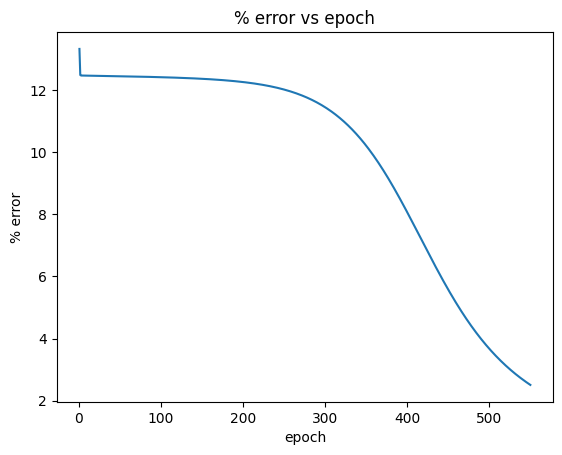

In [ ]:
epoch = []
error = []
for item in output:
    epoch.append(item[0])
    error.append(item[1] * 100)
plt.plot(epoch, error)
plt.xlabel('epoch')
plt.ylabel('% error')
plt.title('% error vs epoch')
plt.show()